In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

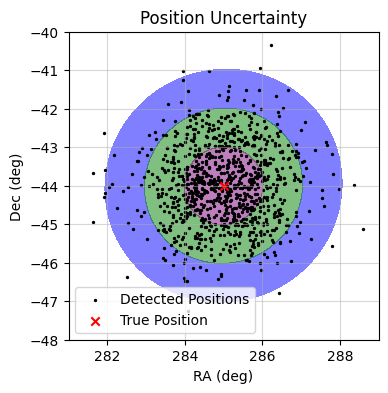

RA std  : 1.02 deg 2.83e-04 arcsec
DEC std : 1.01 deg 2.80e-04 arcsec
Radius of Gyration : 1.43
Confidence intervals: ra=[283.01788497 286.91669915] dec=[-45.86641479 -42.11367961]


In [2]:
# To what accuracy can the detector identify the position of a Source?
ra_true = 285
dec_true = -44

ra_detected = ra_true + np.random.normal(loc=0, scale=1, size=1000)
dec_detected = dec_true + np.random.normal(loc=0, scale=1, size=1000)

# Calculate mean and covariance matrix
mean_position = np.array([ra_true, dec_true])
covariance_matrix = np.cov(ra_detected, dec_detected)

# Create a grid of points for contour plotting
ra_extent  = 4
dec_extent = 4
ngrid      = 100
ra_bins    = np.linspace(ra_true - ra_extent, ra_true + ra_extent, ngrid)
dec_bins   = np.linspace(dec_true - dec_extent, dec_true + dec_extent, ngrid)
ra_grid, dec_grid = np.meshgrid(ra_bins, dec_bins)
positions = np.vstack([ra_grid.ravel(), dec_grid.ravel()]).T


# Calculate the multivariate normal PDF over the grid
mvn = multivariate_normal(mean=mean_position, cov=covariance_matrix)
pdf_values = mvn.pdf(positions)
pdf_values = pdf_values.reshape(ngrid, ngrid)

# Plot 1, 2, and 3 sigma contours
contour_levels = [mvn.pdf(mean_position)]
contour_levels.extend([mvn.pdf(mean_position) * np.exp(-0.5 * i ** 2) for i in range(1, 4)])
contour_levels = sorted(contour_levels)  


plt.figure(figsize=(4, 4))
plt.grid(True, alpha=0.5)
plt.contourf(ra_grid, dec_grid, pdf_values, levels=contour_levels, colors=['blue', 'green', 'purple'], linestyles='dashed',alpha=0.5)
plt.scatter(ra_detected, dec_detected, label='Detected Positions', color='black', s=2)
plt.scatter(ra_true, dec_true, marker='x', color='red', label='True Position')

plt.legend()
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title('Position Uncertainty')
plt.show()

radius_of_gyration = np.sqrt(np.mean((ra_detected - ra_true)**2 + (dec_detected - dec_true)**2))
std_ra  = np.std(ra_detected)
std_dec = np.std(dec_detected)
ci_ra   = np.percentile(ra_detected, [2.5, 97.5])
ci_dec  = np.percentile(dec_detected, [2.5, 97.5])
print(f'RA std  : {std_ra:.2f} deg {std_ra/3600:.2e} arcsec')
print(f'DEC std : {std_dec:.2f} deg {std_dec/3600:.2e} arcsec')
print(f'Radius of Gyration : {radius_of_gyration:.2f}')
print(f'Confidence intervals: ra={ci_ra} dec={ci_dec}')

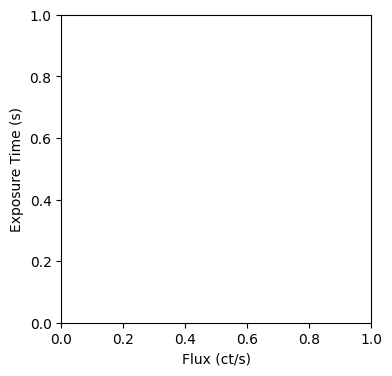

In [3]:
# To What flux level can we detect a source?

source_flux     = 0.15 # ct/s
mean_background = 0.08 # ct/s
exposure_time   = 10000 # seconds

plt.figure(figsize=(4,4))
plt.ylabel('Exposure Time (s)')
plt.xlabel('Flux (ct/s)')
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (676400059.py, line 1)